In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
fashion_mnist=fetch_openml(name='Fashion-MNIST', version=1, cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
fashion_mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X=fashion_mnist.data
y=fashion_mnist.target
X[0]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
        13.,  73.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   1.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,
         0.,   0.,   1.,   3.,   4.,   0.,   0.,   3.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [5]:
y=y.astype(np.int8)
y

array([9, 0, 0, ..., 8, 1, 5], dtype=int8)

In [6]:
X=X/255
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
lables_map = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

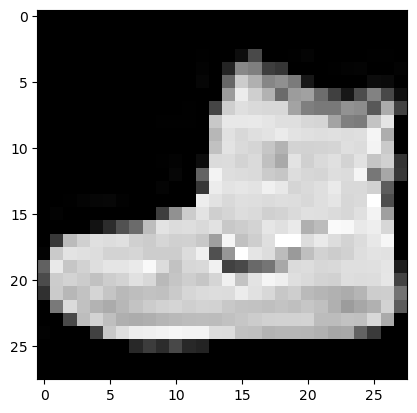

In [8]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.show()

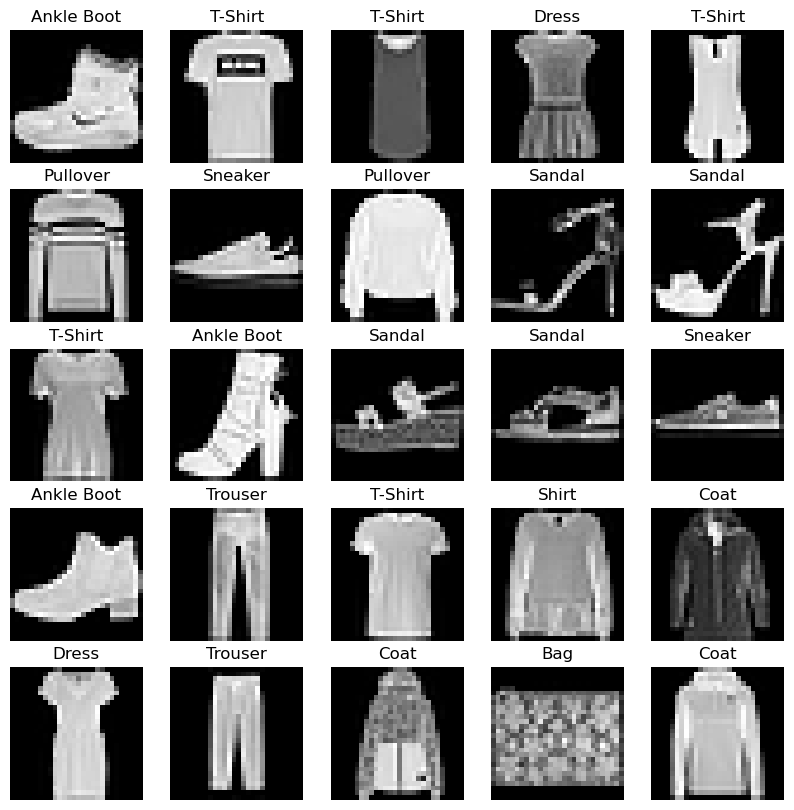

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='nearest')
    # plt.title("sample:%d"%y[i])
    
    plt.title(lables_map[y[i]])
plt.show()

In [10]:
print(X.shape,y.shape)

(70000, 784) (70000,)


In [11]:
import torch
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=1/7,random_state=0)

X_train=torch.Tensor(X_train)
X_test=torch.Tensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784]) torch.Size([60000]) torch.Size([10000])


In [13]:
ds_train=TensorDataset(X_train,y_train)
ds_test=TensorDataset(X_test,y_test)
loader_train=DataLoader(ds_train,batch_size=64,shuffle=True)
loader_test=DataLoader(ds_test,batch_size=64,shuffle=True)

In [14]:
from torch import nn

model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [15]:
from torch import optim
loss_fn=nn.CrossEntropyLoss()

optimizer=optim.Adam(model.parameters(), lr=0.01)


In [16]:
costs, accuracys, epochs=[],[],[]

In [17]:
def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs=model(data)
        loss=loss_fn(outputs, targets)

        _, y_hat=torch.max(outputs.data, 1)
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()
        optimizer.step()
        
    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy.detach().numpy()/60000)
    print("epoch{}:cost={}, Accuracy={}\n".format(epoch, cost, accuracy/60000))

In [18]:
def test():
    model.eval() #신경망을 추론(예측) 모드로 전환
    correct=0

    with torch.no_grad(): #추론(예측)과정에서 미분을 하지 않게 해줌
        for data, targets in loader_test:
            outputs=model(data)
            _, prodicted=torch.max(outputs.data,1)
            correct+=prodicted.eq(targets.data.view_as(prodicted)).sum()
    data_num=len(loader_test.dataset)
    print("\n테스트 데이터에서 예측 정확도:{}/{}({:.2f}%)\n".format(correct,data_num,100. * correct /data_num))


In [19]:
test()


테스트 데이터에서 예측 정확도:1001/10000(10.01%)



In [20]:
for epoch in range(10):
    train(epoch)
test()

epoch0:cost=488.1914641559124, Accuracy=0.8129000067710876

epoch1:cost=395.6562266051769, Accuracy=0.8479333519935608

epoch2:cost=366.0632117241621, Accuracy=0.8599666953086853

epoch3:cost=353.5544890165329, Accuracy=0.8655833601951599

epoch4:cost=345.70369592309, Accuracy=0.8686166405677795

epoch5:cost=341.1031431853771, Accuracy=0.8701666593551636

epoch6:cost=328.8688423857093, Accuracy=0.8749499917030334

epoch7:cost=326.1879817470908, Accuracy=0.8753833174705505

epoch8:cost=321.21369913220406, Accuracy=0.878083348274231

epoch9:cost=318.88312017172575, Accuracy=0.8782666921615601


테스트 데이터에서 예측 정확도:8428/10000(84.28%)



output =  tensor([  5.4618,  -4.1384,  -1.7044,  -1.3037,  -5.4338, -21.7924,   1.9231,
        -28.1316,  -5.7653, -13.8929], grad_fn=<AddBackward0>)
pred =  torch.return_types.max(
values=tensor(5.4618),
indices=tensor(0))
predicted =  tensor(0)
예측 결과: T-Shirt


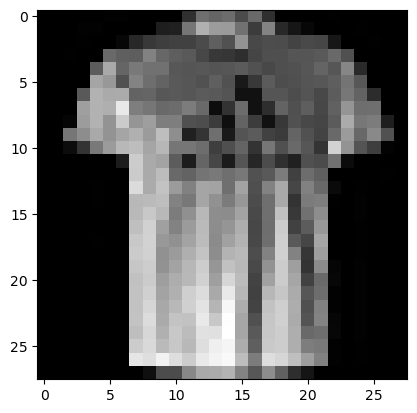

In [21]:
index=11
model.eval()
data=X_test[index]
output=model(data)
print("output = ",output)
pred=torch.max(output.data,0)
print("pred = ", pred)
_, predicted=torch.max(output.data,0) #확률이 가장 높은 레이블이 무엇인지 계산
print("predicted = ",predicted)
predicted = predicted.item()
predicted_label = lables_map[predicted]
print("예측 결과: {}".format(predicted_label))
# print("예측 결과 :{} ".format(predicted))

X_test_show=(X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()

In [22]:
predictions=model(X_test)
predicted=[]
for i in range(len(predictions)):
    v, idx=torch.max(predictions[i],0)
    predicted.append(idx.item())
predicted=torch.from_numpy(np.array(predicted))
print(predicted)
print(y_test)

tensor([9, 5, 4,  ..., 6, 9, 4], dtype=torch.int32)
tensor([9, 5, 6,  ..., 6, 9, 4])


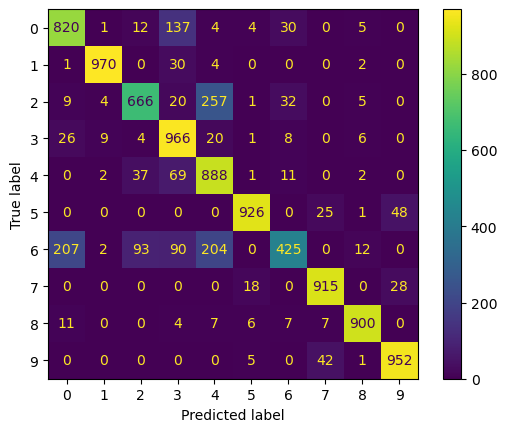

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(cm).plot()